<a href="https://colab.research.google.com/github/Anushkajoshi000/CIFAR/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

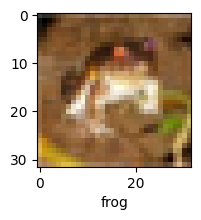

In [ ]:
plot_sample(X_train, y_train, 0)

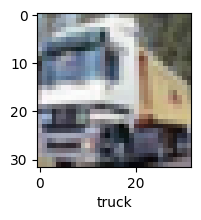

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8134 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.6256 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5439 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4818 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4324 - accuracy: 0.4959


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.39      0.48      1000
           1       0.59      0.36      0.45      1000
           2       0.52      0.09      0.15      1000
           3       0.39      0.20      0.27      1000
           4       0.51      0.17      0.25      1000
           5       0.43      0.26      0.32      1000
           6       0.66      0.20      0.31      1000
           7       0.32      0.60      0.42      1000
           8       0.76      0.29      0.42      1000
           9       0.20      0.91      0.32      1000

    accuracy                           0.35     10000
   macro avg       0.50      0.35      0.34     10000
weighted avg       0.50      0.35      0.34     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.4366 - accuracy: 0.4880
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0899 - accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9555 - accuracy: 0.6672
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8746 - accuracy: 0.6973
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8016 - accuracy: 0.7233
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7422 - accuracy: 0.7410
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6881 - accuracy: 0.7617
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6398 - accuracy: 0.7772
Epoch 9/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5981 - accuracy: 0.7911
Epoch 10/10
1563/1563 [==============================] - 78s 50m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9468 - accuracy: 0.7011


[0.9467585682868958, 0.7010999917984009]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[3.0800360e-04, 5.6247180e-05, 3.1665724e-04, 9.3133169e-01,
        2.1069714e-05, 7.8718979e-03, 1.6305266e-03, 8.9863661e-06,
        5.8016714e-02, 4.3809632e-04],
       [5.7300935e-05, 4.3335739e-03, 2.2756876e-07, 1.8053937e-09,
        2.3574052e-09, 1.3770300e-10, 1.3971932e-09, 2.6654547e-11,
        9.9560863e-01, 6.4419297e-08],
       [2.4127072e-01, 1.4010485e-01, 2.1524506e-03, 1.6586758e-02,
        4.4198305e-04, 6.7089126e-03, 1.2577657e-03, 1.4041812e-03,
        5.5954093e-01, 3.0531358e-02],
       [9.9680120e-01, 1.2478196e-04, 2.0524811e-03, 4.4294284e-05,
        5.7379616e-04, 1.0192389e-05, 8.7695582e-05, 2.5003835e-06,
        3.0170247e-04, 1.1740416e-06],
       [3.8871103e-06, 1.8961624e-05, 2.2609601e-02, 1.4193869e-03,
        2.3203120e-01, 1.6842131e-04, 7.4373186e-01, 1.4757239e-06,
        1.4180596e-05, 1.1079552e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

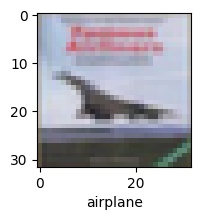

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 37ms/step


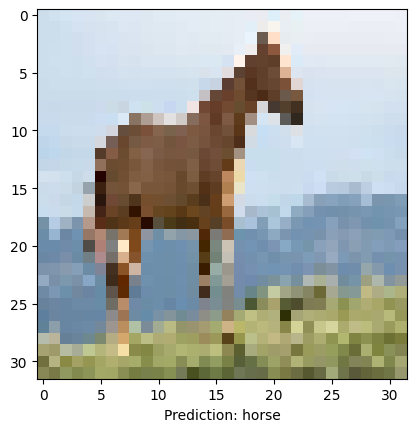

In [ ]:
image_path = '/content/download.jfif'
img = load_img(image_path, target_size=(32, 32))
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = cnn.predict(img_array)
predicted_class = np.argmax(prediction)

# Display the image and prediction
plt.imshow(img)
plt.xlabel(f"Prediction: {classes[predicted_class]}")
plt.show()
